<a href="https://colab.research.google.com/github/Tawhidahmedchetan/INSE6220_Project/blob/main/Water_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Water Quality Classification using Machine Learning
### Author: Tawhid Ahmed Chetan
### ID: 40276069

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [ ]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret

In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.2.0'

**Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [2]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Tawhidahmedchetan/INSE6220_Project/main/WaterQuality.csv')
df.head(5)

aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65    9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32   21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01   14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36   11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92   24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

   radium  selenium  silver  uranium  is_safe  
0    6.78      0.08    0.34     0.02        1  
1    3.21      0.08    0.27     0.05        1  
2    7.07      0.07    0.44     0.01        0  
3    1.72      0.02    0.45     0.05        1  
4    2.41      0.02    0.06     0.02        1  

[5 rows x 21 columns]

In [ ]:
# Remove'#NUM!' values
df.replace('#NUM!', np.nan, inplace=True)

In [ ]:
#convert this dataset to float
df = df.astype('float64')

In [ ]:
# Count the nan and drop them
df.isna().any(axis=1).sum()
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [ ]:
print("Dataset Shape", df.shape)

Dataset Shape (7996, 21)


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


In [ ]:
print("Dataset Shape", df.shape)

Dataset Shape (7996, 21)


**Exploratory Data Analysis**

In [ ]:
sns.pairplot(df, hue='is_safe')
plt.show()

In [ ]:
sns.pairplot(df[0:5], hue='is_safe')
plt.show()

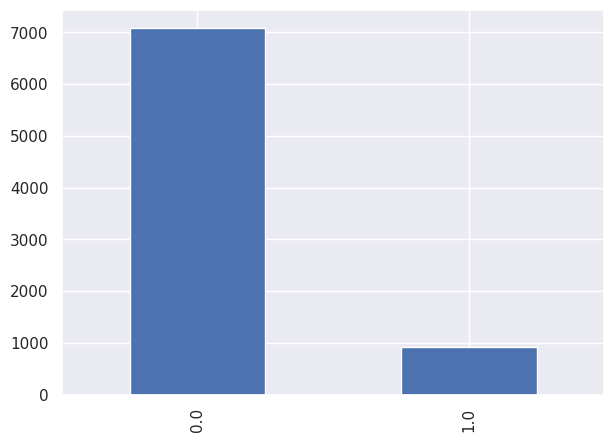

In [ ]:
y = df['is_safe']
y.value_counts().plot(kind='bar')
plt.ylabel('')
plt.show()

**Data Matrix**

In [ ]:
X = df.drop(columns=['is_safe'])
X.head(10)

aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65     9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32    21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01    14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36    11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92    24.33     0.03    0.20    0.006        2.67      0.69    0.57   
5       0.94    14.47     0.03    2.88    0.003        0.80      0.43    1.38   
6       2.36     5.60     0.01    1.35    0.004        1.28      0.62    1.88   
7       3.93    19.87     0.04    0.66    0.001        6.22      0.10    1.86   
8       0.60    24.58     0.01    0.71    0.005        3.14      0.77    1.45   
9       0.22    16.76     0.02    1.37    0.007        6.40      0.49    0.82   

   flouride  bacteria  viruses   lead  nitrates  nitrites  mercury  \
0      0.05      0.20    0.000  0.054     16.08      1.13    0.007   
1      0.90      0.65    0.650  0.100      2.01      1.93    0.003   
2      0.99      0.05    0.003  0.078     14.16      1.11    0.006   
3      1.08      0.71    0.710  0.016      1.41      1.29    0.004   
4      0.61      0.13    0.001  0.117      6.74      1.11    0.003   
5      0.11      0.67    0.670  0.135      9.75      1.89    0.006   
6      0.33      0.13    0.007  0.021     18.60      1.78    0.007   
7      0.86      0.16    0.005  0.197     13.65      1.81    0.001   
8      0.98      0.35    0.002  0.167     14.66      1.84    0.004   
9      1.24      0.83    0.830  0.109      4.79      1.46    0.010   

   perchlorate  radium  selenium  silver  uranium  
0        37.75    6.78      0.08    0.34     0.02  
1        32.26    3.21      0.08    0.27     0.05  
2        50.28    7.07      0.07    0.44     0.01  
3         9.12    1.72      0.02    0.45     0.05  
4        16.90    2.41      0.02    0.06     0.02  
5        27.17    5.42      0.08    0.19     0.02  
6        45.34    2.84      0.10    0.24     0.08  
7        53.35    7.24      0.08    0.08     0.07  
8        23.43    4.99      0.08    0.25     0.08  
9        30.42    0.08      0.03    0.31     0.01

In [ ]:
X.describe().transpose()

count       mean        std   min     25%     50%      75%  \
aluminium    7996.0   0.666396   1.265323  0.00  0.0400   0.070   0.2800   
ammonia      7996.0  14.278212   8.878930 -0.08  6.5775  14.130  22.1325   
arsenic      7996.0   0.161477   0.252632  0.00  0.0300   0.050   0.1000   
barium       7996.0   1.567928   1.216227  0.00  0.5600   1.190   2.4825   
cadmium      7996.0   0.042803   0.036049  0.00  0.0080   0.040   0.0700   
chloramine   7996.0   2.177589   2.567210  0.00  0.1000   0.530   4.2400   
chromium     7996.0   0.247300   0.270663  0.00  0.0500   0.090   0.4400   
copper       7996.0   0.805940   0.653595  0.00  0.0900   0.750   1.3900   
flouride     7996.0   0.771646   0.435423  0.00  0.4075   0.770   1.1600   
bacteria     7996.0   0.319714   0.329497  0.00  0.0000   0.220   0.6100   
viruses      7996.0   0.328706   0.378113  0.00  0.0020   0.008   0.7000   
lead         7996.0   0.099431   0.058169  0.00  0.0480   0.102   0.1510   
nitrates     7996.0   9.819250   5.541977  0.00  5.0000   9.930  14.6100   
nitrites     7996.0   1.329846   0.573271  0.00  1.0000   1.420   1.7600   
mercury      7996.0   0.005193   0.002967  0.00  0.0030   0.005   0.0080   
perchlorate  7996.0  16.465266  17.688827  0.00  2.1700   7.745  29.4875   
radium       7996.0   2.920106   2.322805  0.00  0.8200   2.410   4.6700   
selenium     7996.0   0.049684   0.028773  0.00  0.0200   0.050   0.0700   
silver       7996.0   0.147811   0.143569  0.00  0.0400   0.080   0.2400   
uranium      7996.0   0.044672   0.026906  0.00  0.0200   0.050   0.0700   

               max  
aluminium     5.05  
ammonia      29.84  
arsenic       1.05  
barium        4.94  
cadmium       0.13  
chloramine    8.68  
chromium      0.90  
copper        2.00  
flouride      1.50  
bacteria      1.00  
viruses       1.00  
lead          0.20  
nitrates     19.83  
nitrites      2.93  
mercury       0.01  
perchlorate  60.01  
radium        7.99  
selenium      0.10  
silver        0.50  
uranium       0.09

**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

aluminium   ammonia   arsenic    barium   cadmium  chloramine  chromium  \
0   0.777403 -0.585491 -0.480875  1.054205 -0.993241   -0.711941  2.152993   
1   1.306945  0.775118 -0.599632  1.432447 -1.131948    1.208552  1.598765   
2   0.271572 -0.029083 -0.480875 -0.812340 -0.965499    0.803417  1.044536   
3   0.548198 -0.332067 -0.480875  1.144654 -1.159690    1.968179 -0.802892   
4   0.200439  1.132165 -0.520460 -1.124801 -1.020982    0.191820  1.635713   
5   0.216246  0.021602 -0.520460  1.078873 -1.104207   -0.536643  0.675051   
6   1.338559 -0.977455 -0.599632 -0.179195 -1.076465   -0.349658  1.377073   
7   2.579427  0.629821 -0.480875 -0.746558 -1.159690    1.574731 -0.544252   
8  -0.052477  1.160324 -0.599632 -0.705445 -1.048724    0.374910  1.931302   
9  -0.352814  0.279532 -0.560046 -0.162749 -0.993241    1.644850  0.896742   

     copper  flouride  bacteria   viruses      lead  nitrates  nitrites  \
0 -0.973050 -1.657446 -0.363345 -0.869387 -0.781070  1.129767 -0.348629   
1 -0.223303  0.294799  1.002460  0.849782  0.009785 -1.409197  1.046960   
2 -1.202564  0.501507 -0.818614 -0.861452 -0.368450  0.783298 -0.383518   
3  1.306793  0.708215  1.184567  1.008475 -1.434385 -1.517469 -0.069511   
4 -0.361012 -0.371261 -0.575804 -0.866742  0.302058 -0.555658 -0.383518   
5  0.878366 -1.519641  1.063162  0.902680  0.611523 -0.012496  0.977180   
6  1.643414 -1.014354 -0.575804 -0.850872 -1.348423  1.584507  0.785287   
7  1.612812  0.202928 -0.484750 -0.856162  1.677459  0.691268  0.837621   
8  0.985473  0.478539  0.091923 -0.864097  1.161683  0.873525  0.889956   
9  0.021512  1.075697  1.548782  1.325860  0.164518 -0.907540  0.227051   

    mercury  perchlorate    radium  selenium    silver   uranium  
0  0.609178     1.203362  1.661842  1.053694  1.338736 -0.917040  
1 -0.739005     0.892977  0.124811  1.053694  0.851134  0.198023  
2  0.272132     1.911763  1.786699  0.706129  2.035310 -1.288728  
3 -0.401960    -0.415275 -0.516695 -1.031700  2.104968  0.198023  
4 -0.739005     0.024578 -0.219622 -1.031700 -0.611672 -0.917040  
5  0.272132     0.605207  1.076306  1.053694  0.293875 -0.917040  
6  0.609178     1.632473 -0.034489  1.748826  0.642162  1.313085  
7 -1.413097     2.085330  1.859891  1.053694 -0.472357  0.941398  
8 -0.401960     0.393761  0.891174  1.053694  0.711819  1.313085  
9  1.620315     0.788950 -1.222782 -0.684134  1.129764 -1.288728

In [ ]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
aluminium    7996.0 -1.421796e-16  1.000063 -0.526693 -0.495079 -0.471368   
ammonia      7996.0  1.706156e-16  1.000063 -1.617212 -0.867356 -0.016694   
arsenic      7996.0 -5.687185e-17  1.000063 -0.639217 -0.520460 -0.441289   
barium       7996.0  0.000000e+00  1.000063 -1.289254 -0.828785 -0.310757   
cadmium      7996.0 -3.270132e-16  1.000063 -1.187431 -0.965499 -0.077771   
chloramine   7996.0  0.000000e+00  1.000063 -0.848285 -0.809330 -0.641822   
chromium     7996.0  0.000000e+00  1.000063 -0.913738 -0.728995 -0.581200   
copper       7996.0 -8.530778e-17  1.000063 -1.233166 -1.095458 -0.085594   
flouride     7996.0  1.328491e-16  1.000063 -1.772284 -0.836355 -0.003780   
bacteria     7996.0  5.687185e-17  1.000063 -0.970370 -0.970370 -0.302643   
viruses      7996.0  1.421796e-17  1.000063 -0.869387 -0.864097 -0.848228   
lead         7996.0  1.635066e-16  1.000063 -1.709466 -0.884225  0.044170   
nitrates     7996.0  1.306275e-16  1.000063 -1.771906 -0.869645  0.019985   
nitrites     7996.0  1.990515e-16  1.000063 -2.319897 -0.575412  0.157272   
mercury      7996.0 -5.042934e-17  1.000063 -1.750143 -0.739005 -0.064914   
perchlorate  7996.0  1.137437e-16  1.000063 -0.930887 -0.808203 -0.493012   
radium       7996.0 -8.530778e-17  1.000063 -1.257225 -0.904182 -0.219622   
selenium     7996.0 -1.766138e-17  1.000063 -1.726831 -1.031700  0.010997   
silver       7996.0 -1.706156e-16  1.000063 -1.029616 -0.750986 -0.472357   
uranium      7996.0 -1.057461e-16  1.000063 -1.660415 -0.917040  0.198023   

                  75%       max  
aluminium   -0.305392  3.464632  
ammonia      0.884654  1.752774  
arsenic     -0.243361  3.517278  
barium       0.752022  2.772741  
cadmium      0.754475  2.418966  
chloramine   0.803417  2.533030  
chromium     0.711999  2.411633  
copper       0.893667  1.827026  
flouride     0.891956  1.672854  
bacteria     0.881055  2.064753  
viruses      0.982026  1.775489  
lead         0.886603  1.729036  
nitrates     0.864502  1.806463  
nitrites     0.750397  2.791445  
mercury      0.946224  1.620315  
perchlorate  0.736230  2.461862  
radium       0.753401  2.182796  
selenium     0.706129  1.748826  
silver       0.642162  2.453255  
uranium      0.941398  1.684773

**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

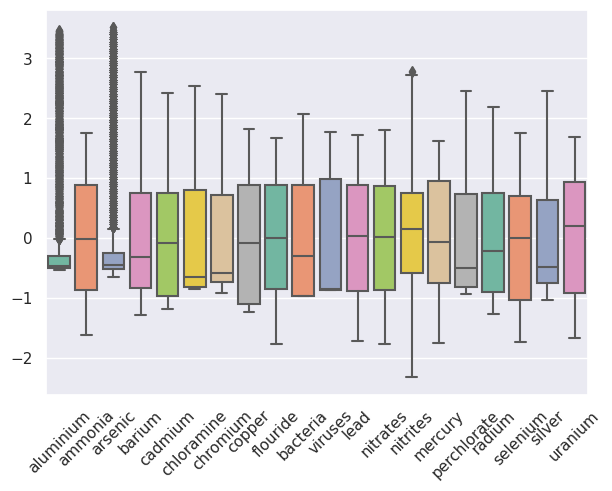

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


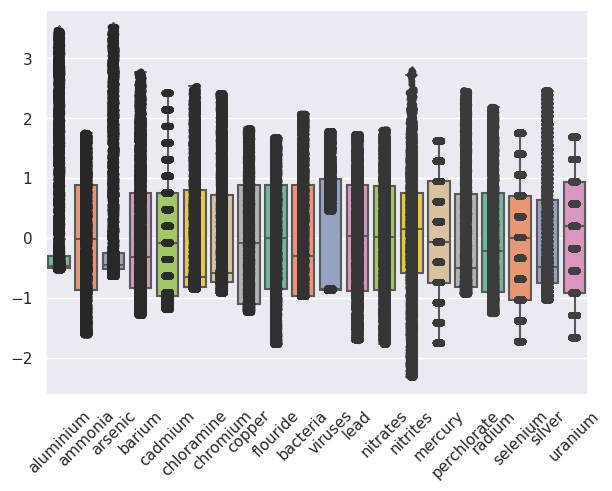

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

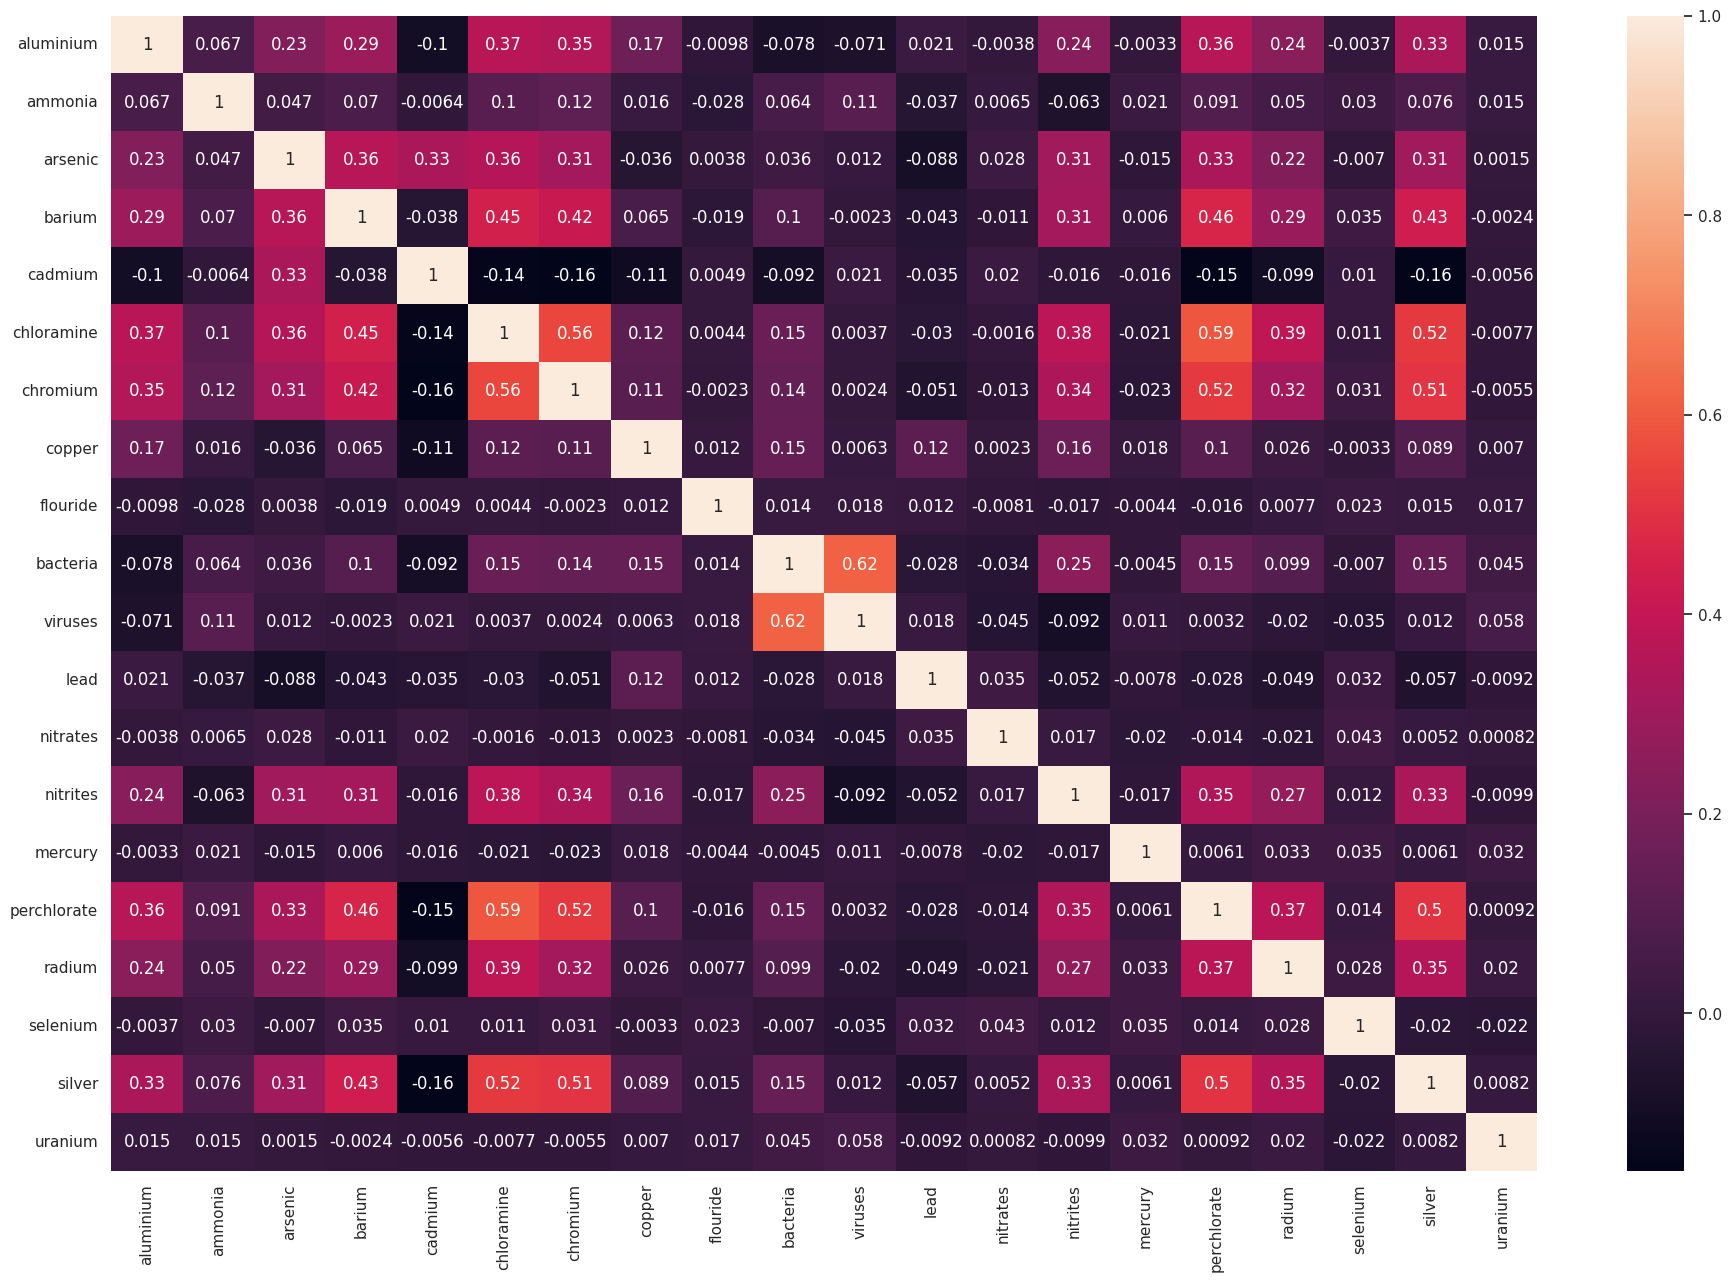

In [ ]:
plt.figure(figsize=(23, 15))
sns.heatmap(X.corr(), annot=True)
plt.show()
# ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.9, annot=True, cbar=False, square=True)
# plt.yticks(rotation=0)
# ax.tick_params(labelbottom=False,labeltop=True)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

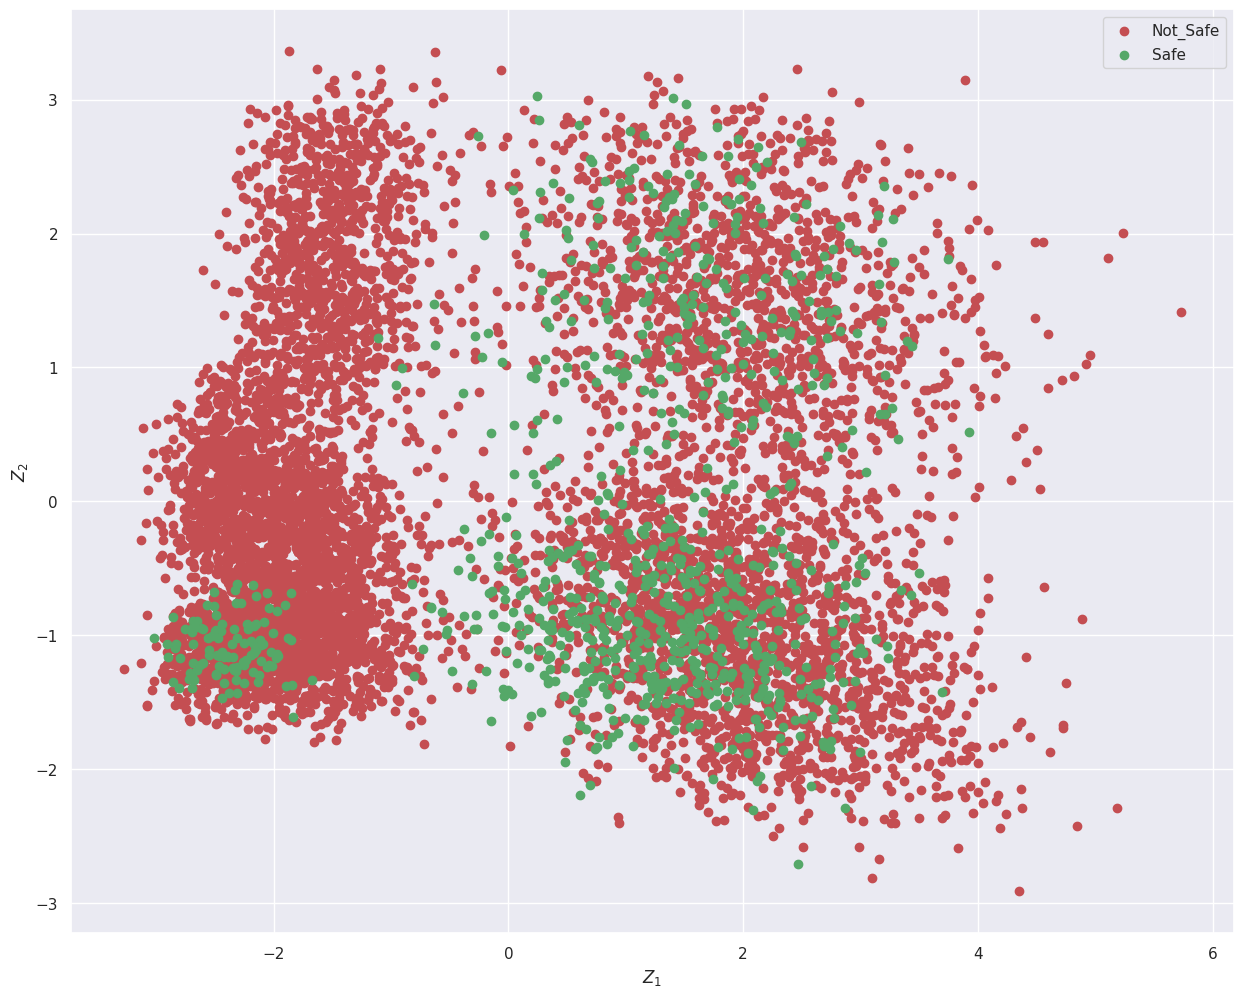

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# Not_safe->0,  Safe->1
not_safe = np.where(y == 0)
safe = np.where(y == 1)

plt.figure(figsize=(15, 12))

plt.scatter(Z[not_safe,0], Z[not_safe,1], c='r', label='Not_Safe')
plt.scatter(Z[safe,0], Z[safe,1], c='g', label='Safe')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

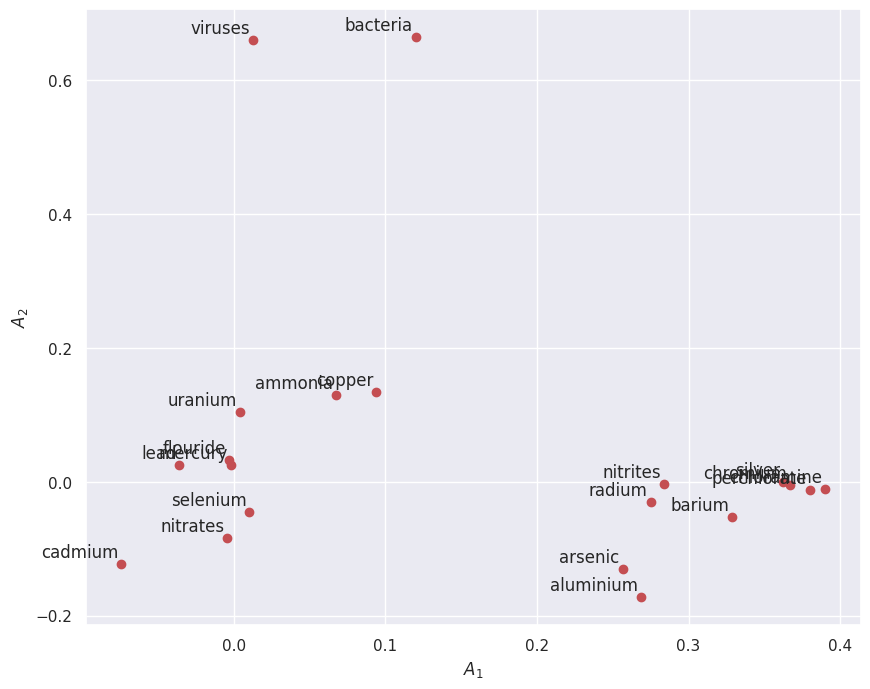

In [ ]:
A = pca.components_.T
plt.figure(figsize=(10, 8))
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


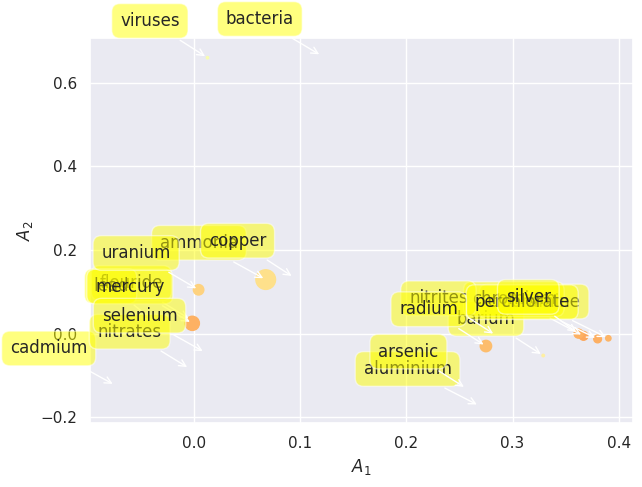

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

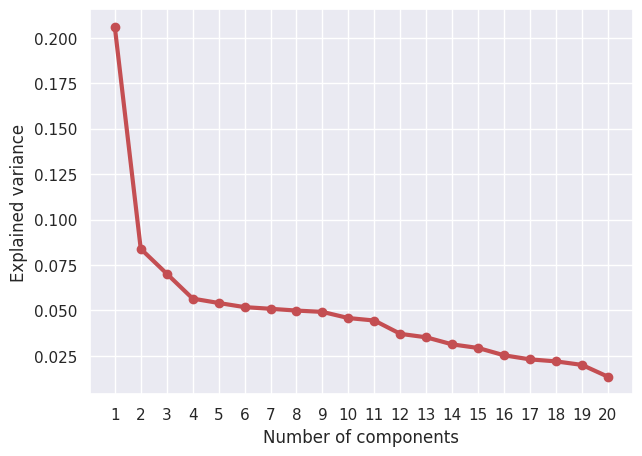

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

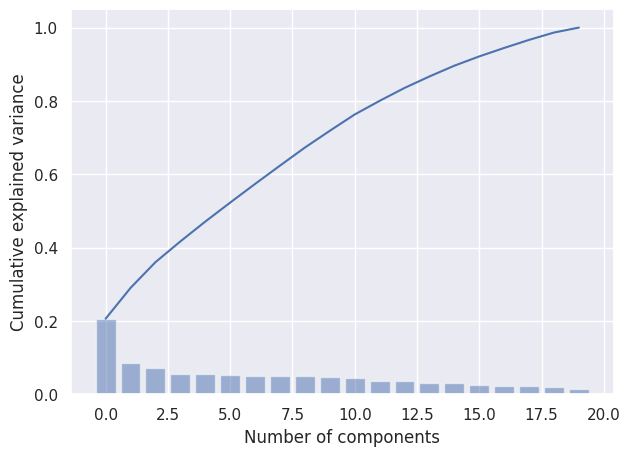

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

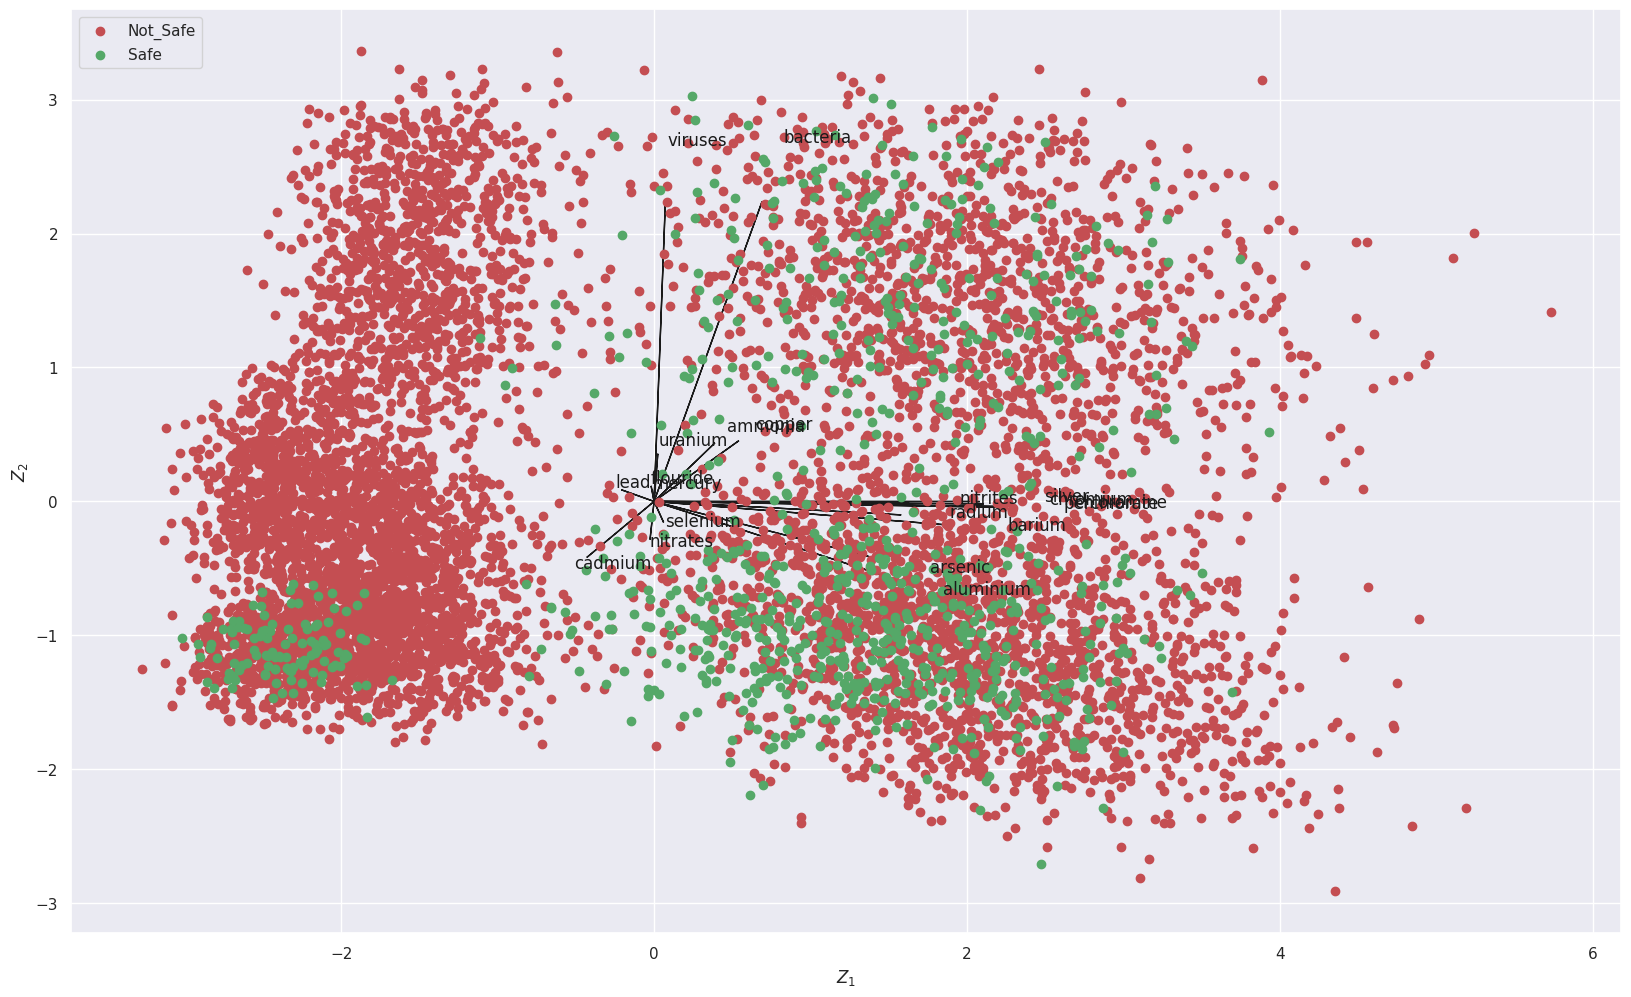

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure(figsize= (20, 12))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[not_safe,0], Z[not_safe,1], c='r', label='Not_Safe')
plt.scatter(Z[safe,0], Z[safe,1], c='g', label='Safe')

plt.legend(loc='upper left')

##**Using PCA Library**

In [ ]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.4 MB/s eta 0:00:00


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [20] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [18] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [20] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[18]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     2.167658 -1.390492 -0.904675  1.442392 -0.588738  0.897288  1.210630   
1     2.970856  1.255835 -0.969101  0.772716 -0.078181  0.208509  0.747966   
2     2.083177 -1.409226 -1.086877  1.441028 -0.430279  0.329753  2.007557   
3     1.705439  1.810527 -0.869402  0.658277  1.947159 -0.412658 -0.061819   
4    -0.137774 -0.667038 -1.256153  1.098624  0.461757  1.605855 -0.311959   
...        ...       ...       ...       ...       ...       ...       ...   
7991 -1.895960 -1.377153 -0.495409 -0.947170 -1.180632 -0.491738  1.629750   
7992 -1.968274 -0.817746 -0.128851  1.414017 -0.664203 -0.388870  1.197798   
7993 -2.010399 -1.227654 -0.554167 -0.603401  1.248466  0.823504 -0.317455   
7994 -2.390703 -1.160668 -0.248392  2.338874  2.734600  2.639177  0.007913   
7995 -2.039979 -1.220194 -0.516464 -0.654344  1.247824  0.709153 -0.241505   

           PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0     1.441995 -1.462521 -0.040824 -0.890603 -0.384150  0.883849 -0.602848   
1    -0.497896  0.813821 -1.458777  0.329847 -0.720080 -0.148411  0.953684   
2    -0.335940 -0.479345  0.793969 -1.112402  0.642487  0.605251 -0.103134   
3    -0.520686  0.655571  0.316104  1.110270 -1.197061  0.111364 -0.839792   
4    -0.592178  0.866663  0.297176  0.012265  0.395393 -0.450147  0.891761   
...        ...       ...       ...       ...       ...       ...       ...   
7991 -0.792455  0.098341 -0.246673 -1.451244 -0.142248 -0.351122  0.101984   
7992 -2.380015 -0.735290 -1.075218  1.350257 -0.061610 -0.469811  0.624416   
7993 -1.776783 -0.987419  0.105160 -1.780688  1.396970  0.220676  0.002943   
7994  0.273728  0.943495 -0.367596  0.009293 -1.240676  0.123520 -1.097141   
7995 -1.892119 -0.936562  0.170436 -1.767366  1.414062  0.188859 -0.047498   

          PC15      PC16      PC17      PC18  
0    -0.049369  0.761552 -1.148159 -0.732914  
1     0.722783  0.044128 -0.420661 -0.501818  
2    -1.502373  0.473653  0.807359 -0.585912  
3     0.610826  1.109920  1.309307  0.414616  
4    -1.073225 -0.547462 -1.153147  0.061757  
...        ...       ...       ...       ...  
7991  0.855983  0.136323 -0.093678 -0.085153  
7992  0.260448  0.240621  0.474217  0.576338  
7993  0.284866 -0.011831 -0.391580  0.081292  
7994  0.576150 -0.583142  0.007947  0.749828  
7995  0.397463 -0.024524 -0.291733  0.128579  

[7996 rows x 18 columns]

**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '18 Principal Components explain [98.64%] of the variance'}, xlabel='PC1 (20.6% expl.var)', ylabel='PC2 (8.39% expl.var)'>)

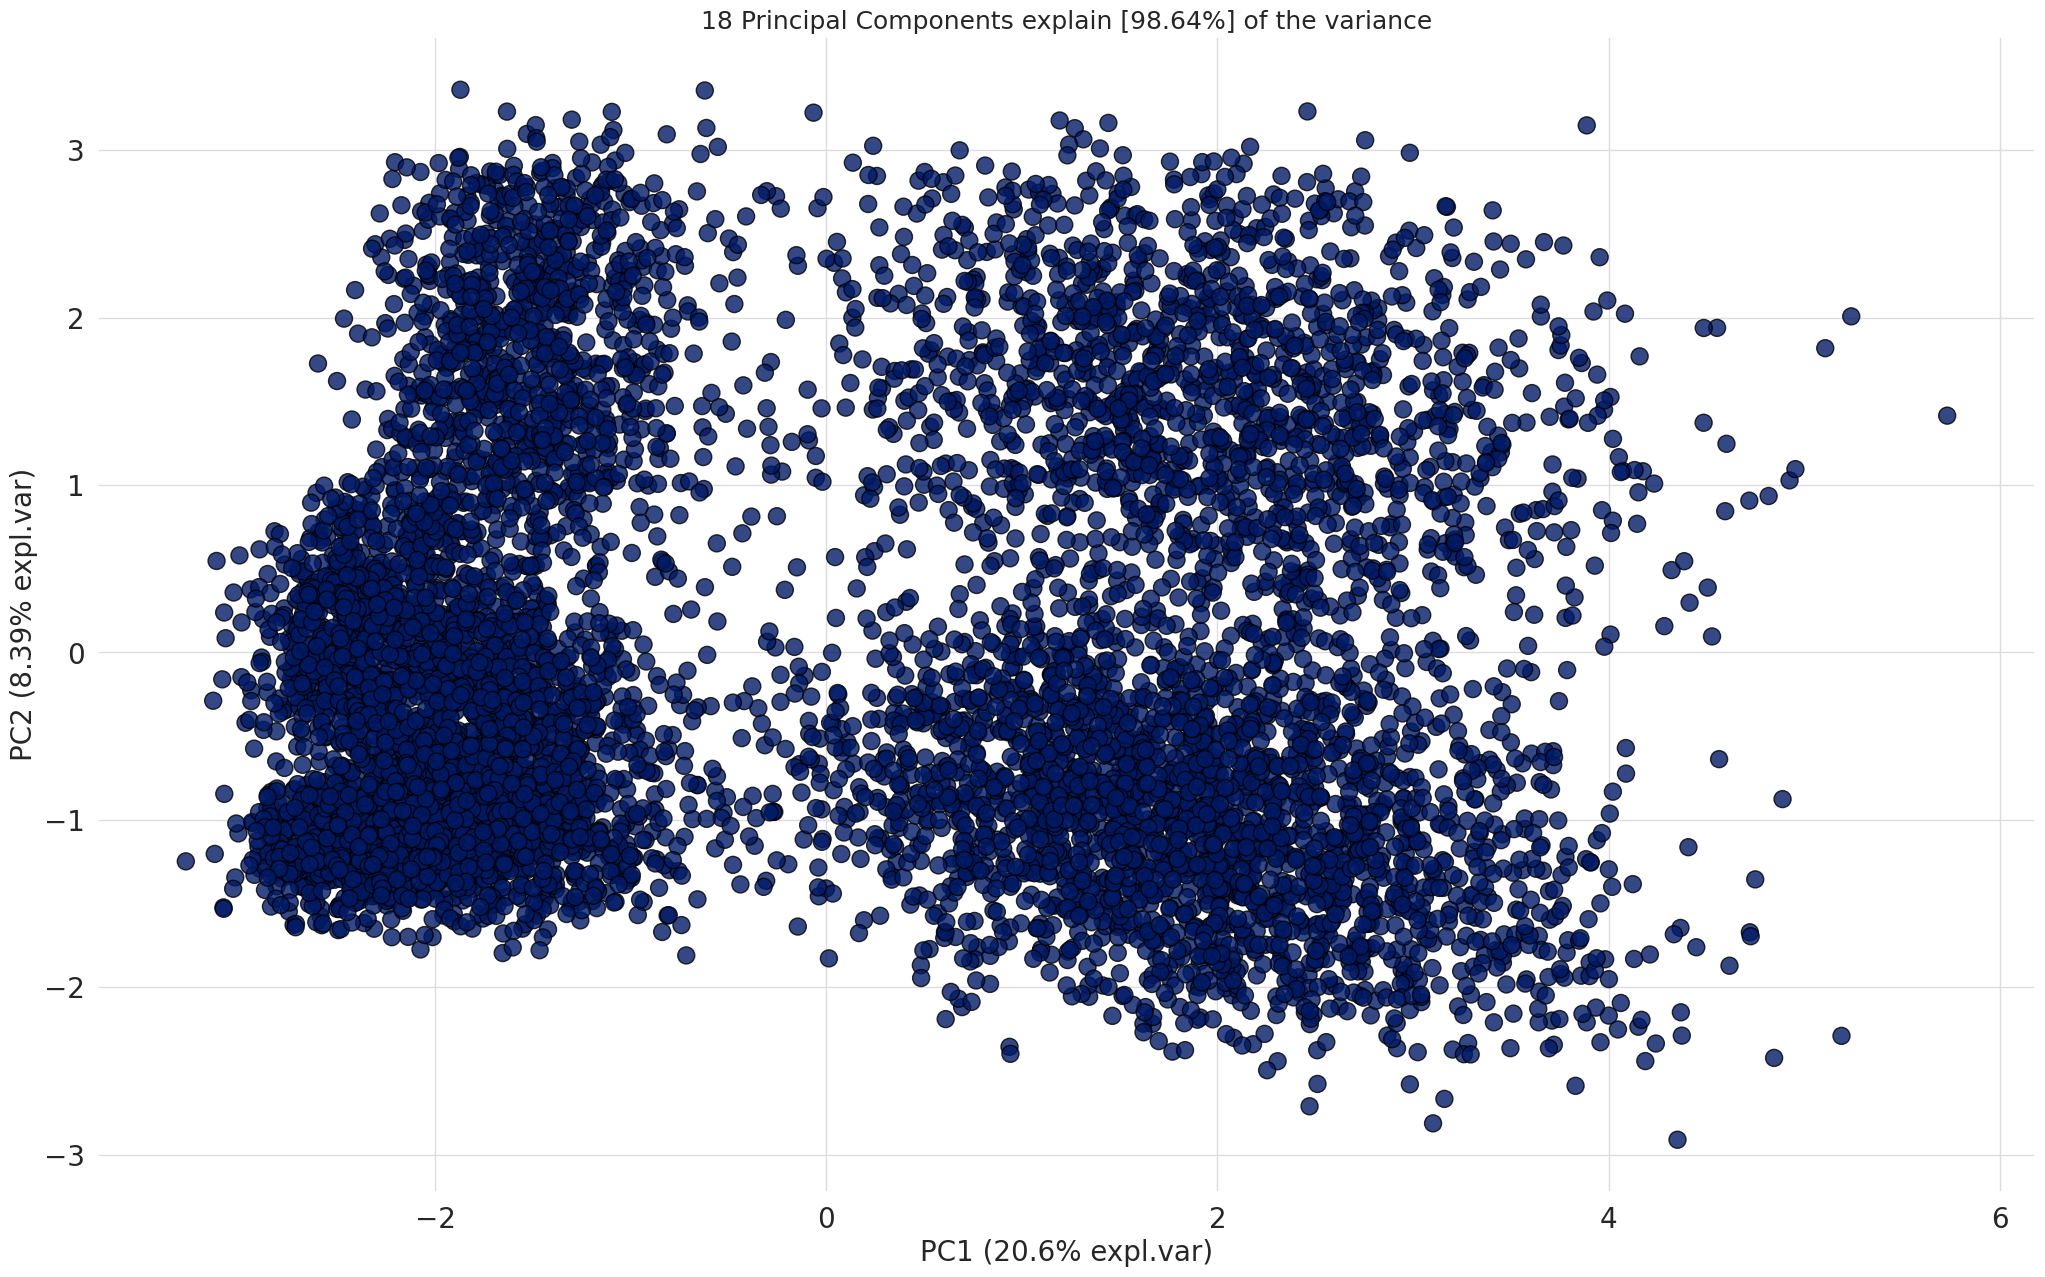

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T

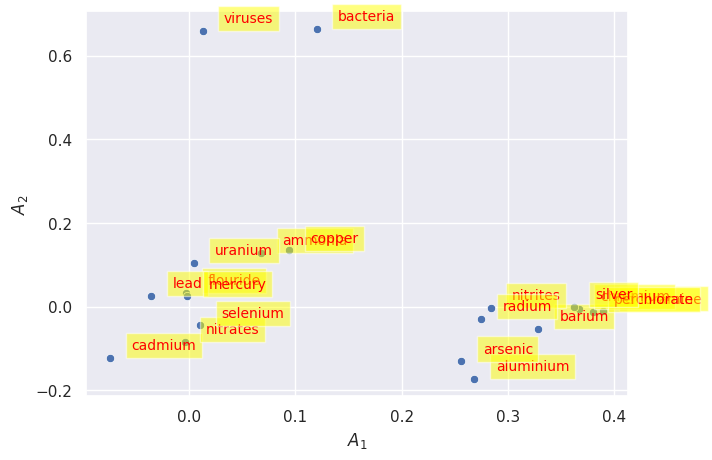

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

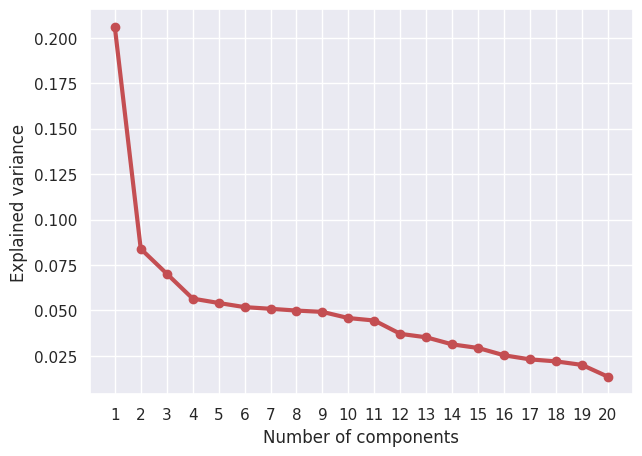

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

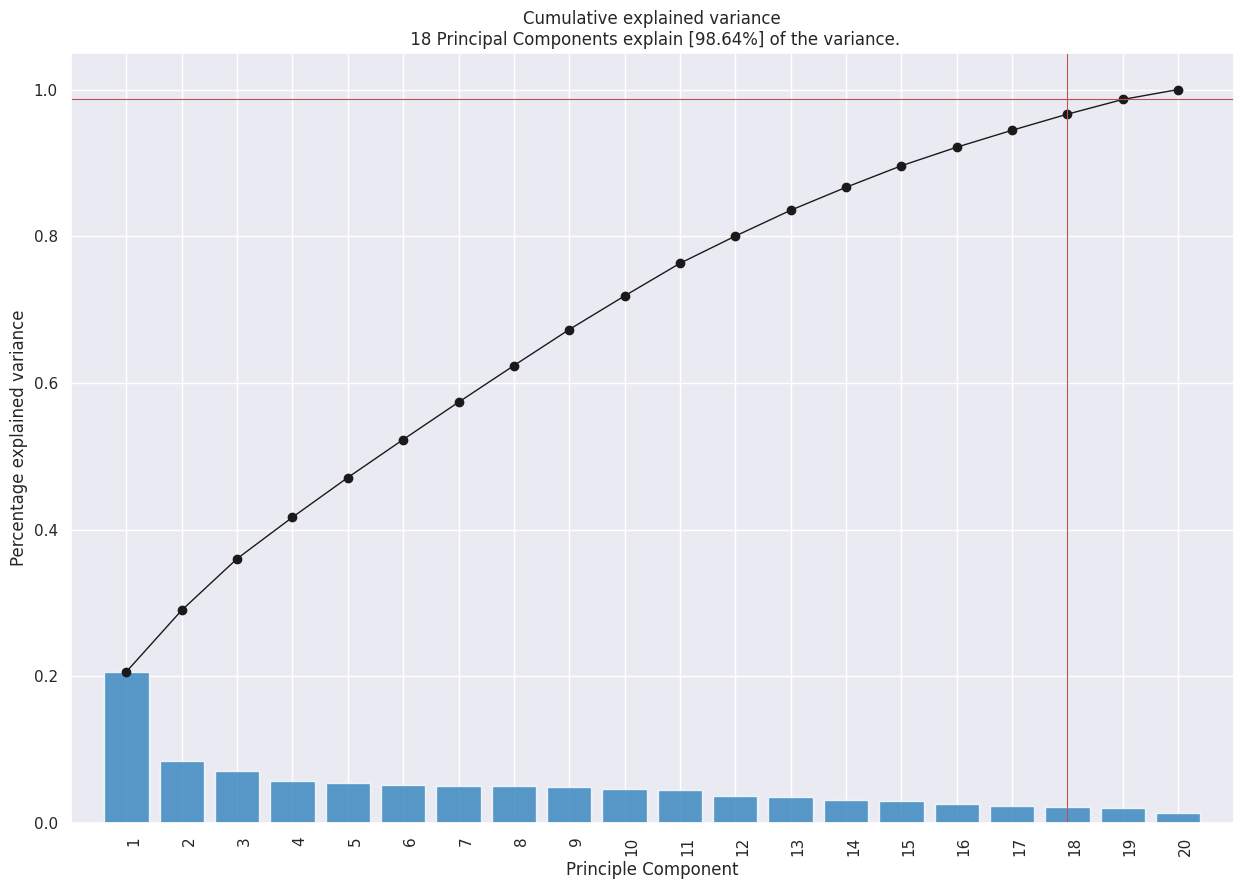

In [ ]:
model.plot();

**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '18 Principal Components explain [98.64%] of the variance'}, xlabel='PC1 (20.6% expl.var)', ylabel='PC2 (8.39% expl.var)'>)

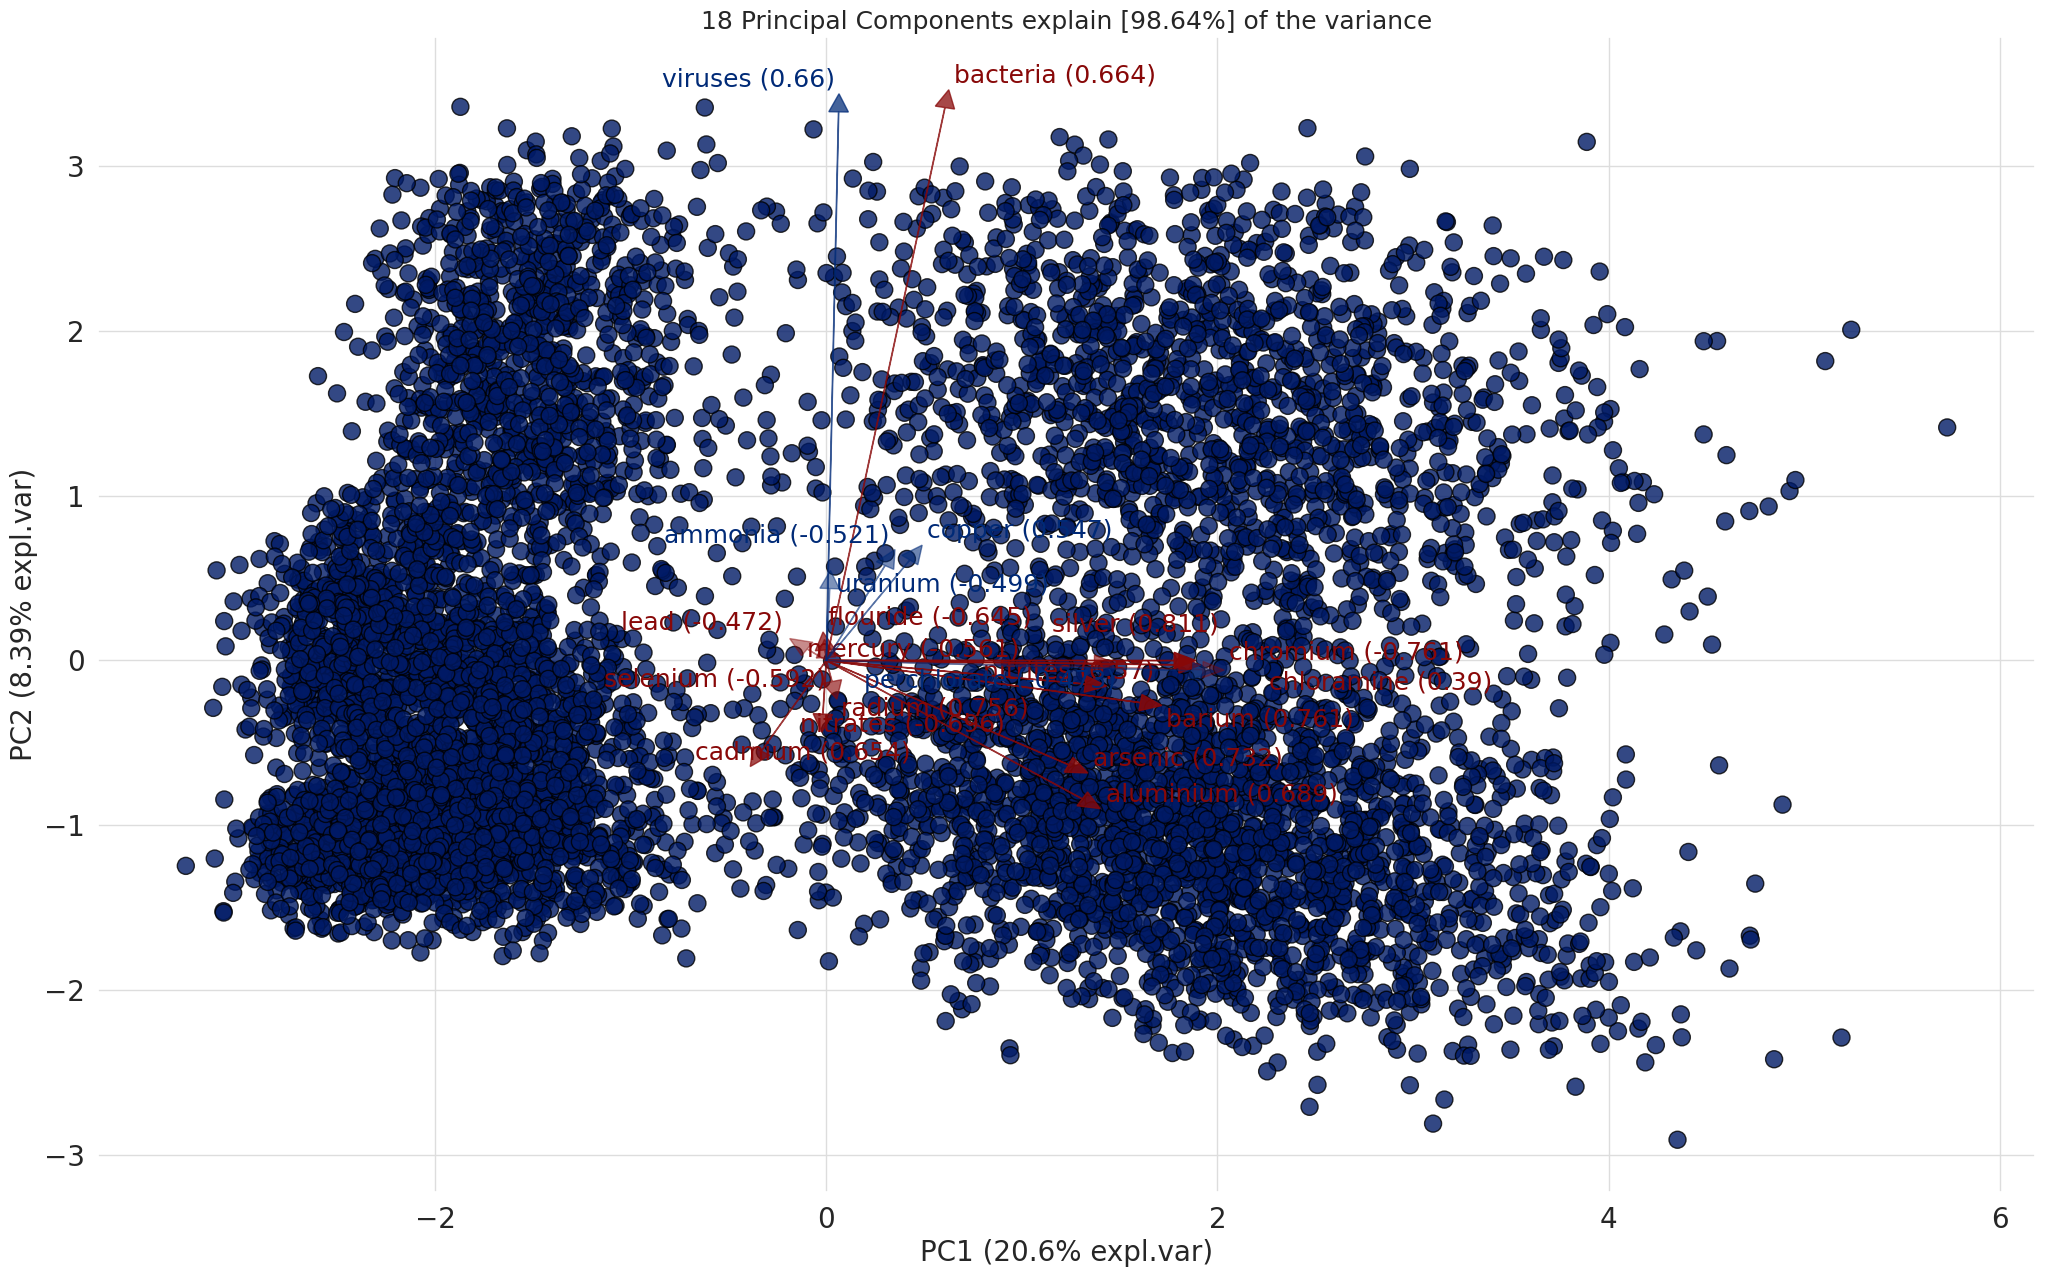

In [ ]:
model.biplot(label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '18 Principal Components explain [98.64%] of the variance'}, xlabel='PC1 (20.6% expl.var)', ylabel='PC2 (8.39% expl.var)', zlabel='PC3 (7.02% expl.var)'>)

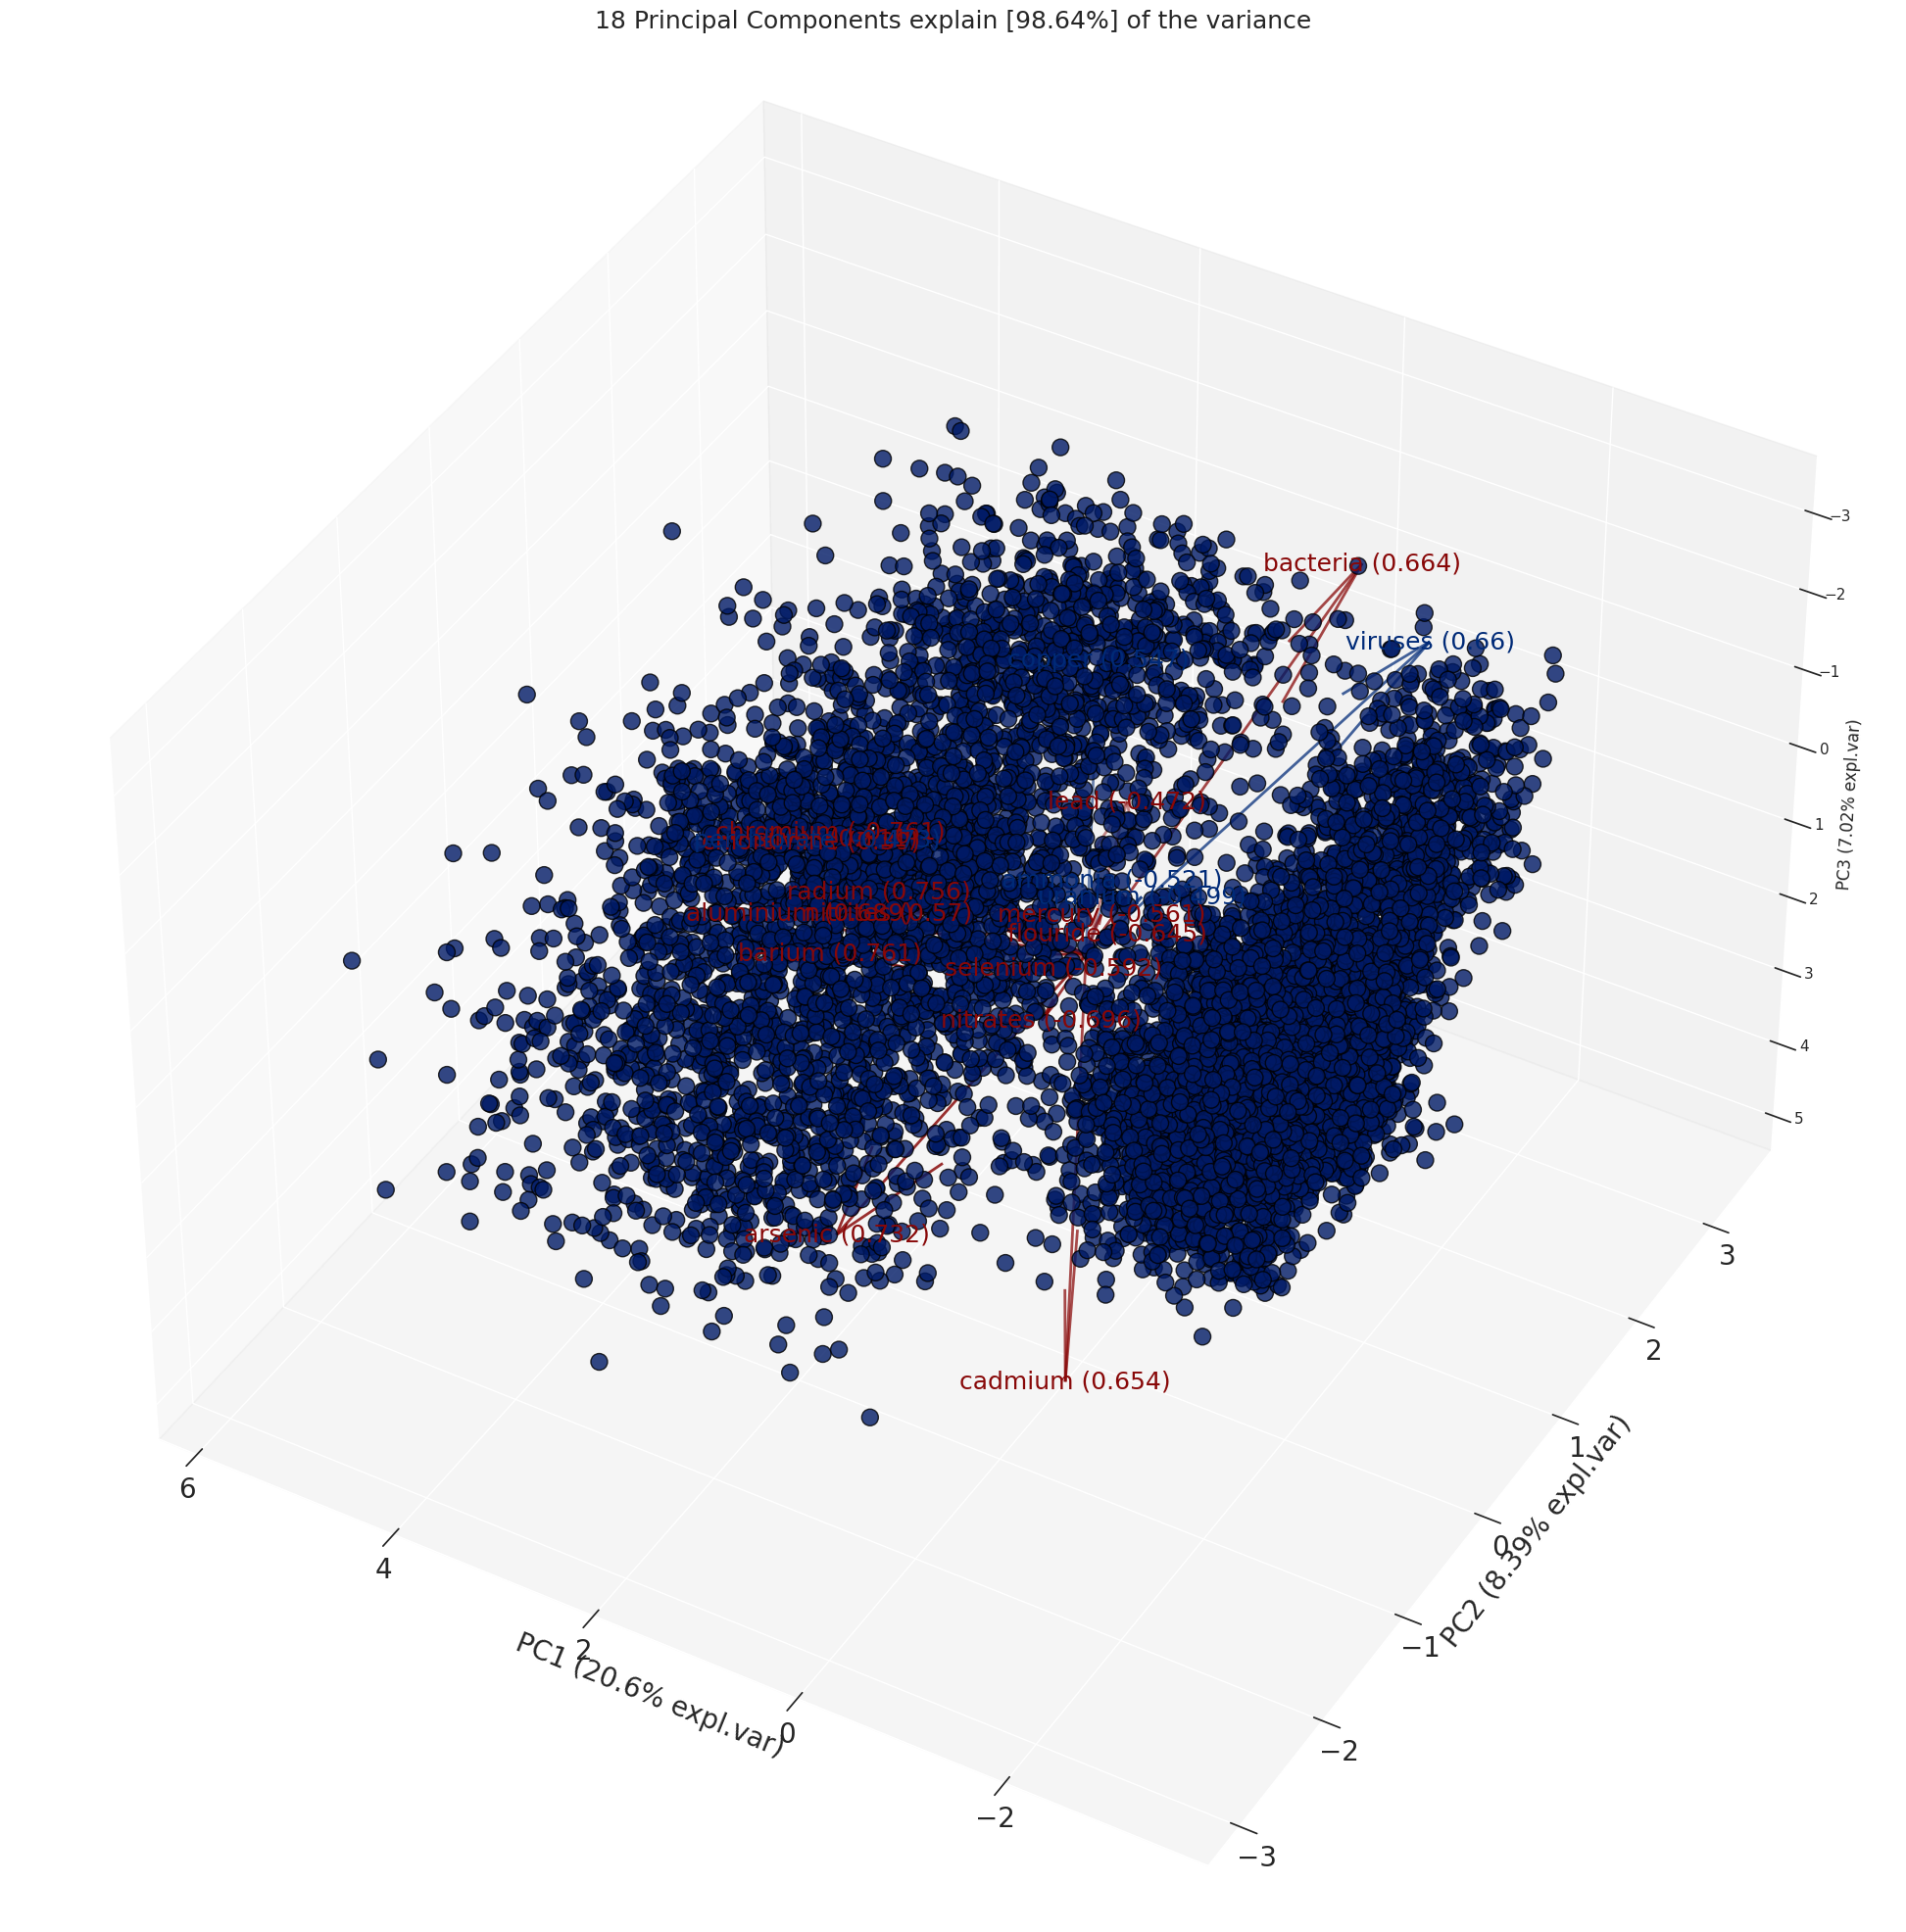

In [ ]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [ ]:
# For Google Colab only
# from pycaret.utils import enable_colab
# enable_colab()

In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.8, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (6397, 21)
Unseen Data For Predictions: (1599, 21)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='is_safe', train_size=0.7, session_id=123)

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference.

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline.

**Comparing All Models**

In [ ]:
 #show the best model and their statistics
 best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [ ]:
dt = create_model('dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#trained model object is stored in the variable 'dt'.
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [ ]:
tuned_dt = tune_model(dt)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'.
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_samples_leaf=5,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

In [ ]:
!pip install statsmodels --upgrade

How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create K Neighbors Model**

In [ ]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune K Neighbors Model**

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate K Neighbors Model**

In [ ]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Logistic Regression Model**

In [ ]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Logistic Regression Model**

In [ ]:
tuned_lr = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Logistic Regression Model**

In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Random Forest Model**

In [ ]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Random Forest Model**

In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_best_model

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='is_safe', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model_pca

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=123)

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_best_model_pca

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=0.2, n_estimators=230,
                   random_state=123)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.